In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])
"""
# make a normalized copy of df
df_min_max_scaled = df.copy()
columns = ['repo', 'cena', 'doba', 'nove', 'zobrazeni']
for column in columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())	
display(df_min_max_scaled)
X= df_min_max_scaled[['datum', 'repo']]
Y= df_min_max_scaled[['aktivni']]
"""
import time
models = []
rmse_list = []
for i in range(1,7):
    timeout = time.time() + 5 
    best_rmse = 100000000000
    iteration = 0

    repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7', 'repo-8', 'repo-9', 'repo-10', 'repo-11', 'repo-12' ]
    aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7', 'aktivni-7', 'aktivni-7', 'aktivni-10', 'aktivni-11', 'aktivni-12']
    nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7', 'nove-8', 'nove-9', 'nove-10', 'nove-11', 'nove-12']
    cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7','cena-8','cena-9','cena-10','cena-11','cena-12']
    zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7','zobrazeni-8','zobrazeni-9','zobrazeni-10','zobrazeni-11','zobrazeni-12']
    doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7','doba-8','doba-9','doba-10','doba-11','doba-12']
    #
    X = df[["datum", *repo[i-1:], *aktivni[i-1:], *nove[i-1:],*cena[i-1:], *zobrazeni[i-1:], *doba[i-1:]]]
    
    Y = df[['aktivni']]
    while time.time() < timeout:
        iteration +=1
        X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
        # Train the model on the train set
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        # Predict on the test set
        y_pred = linreg.predict(X_test)
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        if rmse < best_rmse:
            best_rmse = rmse
            model = linreg
            
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the best model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    models.append(model)
    print(len(models))
    print(f"Mean absolute error: {mae:.2f}")
    print(f"Mean squared error: {mse:.2f}")
    print(f"Root mean squared error: {rmse:.2f}")
    rmse_list.append(rmse)
    #graf
    graf = False
    if graf:
        import matplotlib.pyplot as plt
        plt.plot(y_pred, label='y_pred')
        #plt.plot(y_train.values, label='y_train')
        plt.plot(y_test.values, label='y_test')
        plt.legend()
        plt.show()


1
Mean absolute error: 42.37
Mean squared error: 15081.09
Root mean squared error: 122.81
2
Mean absolute error: 309.22
Mean squared error: 432748.13
Root mean squared error: 657.84
3
Mean absolute error: 411.71
Mean squared error: 403263.86
Root mean squared error: 635.03
4
Mean absolute error: 475.21
Mean squared error: 409841.67
Root mean squared error: 640.19
5
Mean absolute error: 519.84
Mean squared error: 397323.29
Root mean squared error: 630.34
6
Mean absolute error: 318.38
Mean squared error: 145888.48
Root mean squared error: 381.95
CPU times: total: 12 s
Wall time: 34.6 s


In [3]:
# Ulozit model
#ulozit model
import pickle
i=1
for model in models:
    filename = f'finalized_model_longterm12month_{i}.sav'
    pickle.dump(model, open(filename, 'wb'))
    #ulozit rmse pro modely
    with open('rmse.pkl', 'wb') as file:
        pickle.dump(rmse_list, file)
    i +=1

predikce

   index   datum  predikce                  min                  max
0     96  202302      9033  [8910.646480162211]  [9156.256694554768]
1     97  202303      8250  [7593.068437863066]  [8908.740321728244]
2     98  202304      8414  [7779.143791970985]  [9049.204986919462]
3     99  202305      7824  [7184.177075069596]  [8464.554633525933]
4    100  202306      8585  [7954.927681650128]  [9215.599392471742]
5    101  202307      6714  [6332.797170762632]  [7096.704182413679]


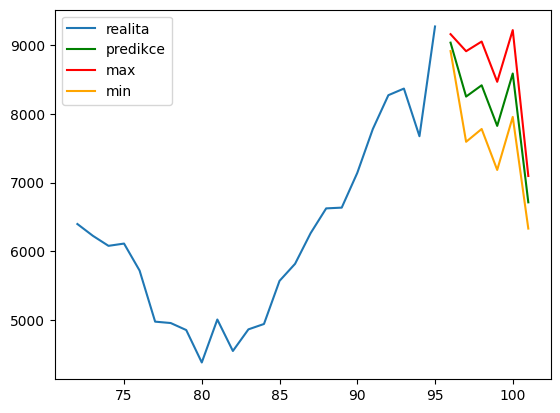

In [5]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
# definovat listy promenejch
repo = ['repo', 'repo-1', 'repo-2', 'repo-3', 'repo-4', 'repo-5', 'repo-6', 'repo-7', 'repo-8', 'repo-9', 'repo-10', 'repo-11', 'repo-12' ]
aktivni = ['aktivni-1', 'aktivni-2', 'aktivni-3', 'aktivni-4', 'aktivni-5', 'aktivni-6', 'aktivni-7', 'aktivni-7', 'aktivni-7', 'aktivni-10', 'aktivni-11', 'aktivni-12']
nove = ['nove-1', 'nove-2', "nove-3", 'nove-4', 'nove-5', 'nove-6', 'nove-7', 'nove-8', 'nove-9', 'nove-10', 'nove-11', 'nove-12']
cena = ['cena-1','cena-2','cena-3','cena-4','cena-5','cena-6','cena-7','cena-8','cena-9','cena-10','cena-11','cena-12']
zobrazeni = ['zobrazeni-1','zobrazeni-2','zobrazeni-3','zobrazeni-4','zobrazeni-5','zobrazeni-6','zobrazeni-7','zobrazeni-8','zobrazeni-9','zobrazeni-10','zobrazeni-11','zobrazeni-12']
doba = ['doba-1','doba-2','doba-3','doba-4','doba-5','doba-6','doba-7','doba-8','doba-9','doba-10','doba-11','doba-12']

#nacist modely
# nacist nejlepsi model
for i in range(1,len(models)):
    filename = fr'C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\finalized_model_longterm{i}.sav'
    model = pickle.load(open(filename, 'rb'))
#nacist rmse pro modely
with open('rmse.pkl', 'rb') as file:
    rmse_values = pickle.load(file)


predictions = []
for i in range(1,7):
    # vybrat spravny x promeny
    x_new = df.drop(df.index[:-12])
    x_new = x_new[["datum", *repo[i-1:], *aktivni[i-1:], *nove[i-1:],*cena[i-1:], *zobrazeni[i-1:], *doba[i-1:]]]
    # vybrat spravnej radek a ostatni odstranit
    x_new_pro_graf = x_new
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[i:])
    x_new_pro_graf = x_new_pro_graf.drop(x_new_pro_graf.index[:-1])
    x_new = x_new.reset_index(drop=True)
    x_new = x_new.drop(x_new.index[i:])
    x_new = x_new.drop(x_new.index[:-1])

    # vybrat spravnej model
    model = models[i-1]
    #predikce na novych datech
    y_new_pred = model.predict(x_new)
    #print(f"{x_new[['datum']]} : {str(y_new_pred)[2:-2]}\n")
    
    # Create a dictionary to hold the values for each prediction
    prediction = {"index" : int(x_new_pro_graf.index.values),
                "datum": x_new["datum"].values[0],
                "predikce": int(y_new_pred[0]),
                "min": y_new_pred[0] - rmse_values[i-1],
                "max": y_new_pred[0] + rmse_values[i-1]}
    # Add the prediction to the list of predictions
    predictions.append(prediction)
    
# Create the final dataframe from the list of predictions
df_predictions = pd.DataFrame(predictions)
print(df_predictions)
#graf
plt.plot(X.index[-24:].values,Y[-24:], label='realita')
plt.plot(df_predictions['index'], df_predictions['predikce'], color="green", label="predikce")
plt.plot(df_predictions['index'], df_predictions['max'], color='red', label="max")
plt.plot(df_predictions['index'], df_predictions['min'], color="orange", label="min")
# zobrazuje graf od 0 na ose y
#plt.ylim(0, 11000)
plt.legend()
plt.show()

